In [4]:
%pip install beautifulsoup4
%pip install requests
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/87/03/fe50521919aa981f6a1c197037da4623a267b0e5f42246d69ba048e86da3/pandas-2.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy<2,>=1.26.0 from https://files.pythonhosted.org/packages/ad/11/52fbe97fd84c91105b651d25a122f8deed6d3519afb14f9771fac1c9b7de/numpy-1.26.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/3b/dd/9b84302ba85ac6d3d3042d3e8698374838bde1c386b4adb1223d7a0efd4e/pytz-2023.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://fi


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<!DOCTYPE html>
<html dir="ltr" lang="en-IN"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Be prepared with the most accurate 10-day forecast for Teen Murti Marg Area, Delhi with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="app-id=295646461" data-react-helmet="true" name="apple-itunes-app
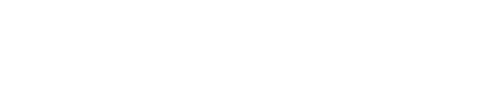
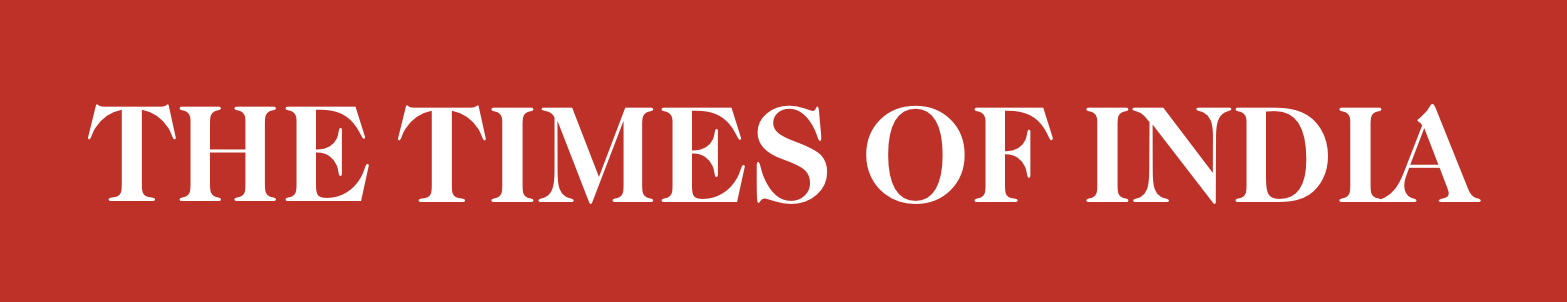

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url ="https://weather.com/en-IN/weather/tenday/l/a5f0fe2ff9a40acc9ce62d67cd99439a71cde78cc0c5c1fbf6da052bef4cdba9"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')
print(soup)

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://weather.com/en-IN/weather/tenday/l/a5f0fe2ff9a40acc9ce62d67cd99439a71cde78cc0c5c1fbf6da052bef4cdba9"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

day_elements = soup.find_all("h3", class_="DetailsSummary--daypartName--kbngc")

data = {'Date': [], 'Day_name': []}

# Using list comprehension to populate data
data['Date'] = [(pd.to_datetime('today') + pd.DateOffset(days=index)).strftime('%d-%m-%Y') for index in range(len(day_elements))]
data['Day_name'] = [date.strftime('%A') for date in pd.to_datetime(data['Date'], format='%d-%m-%Y')]

weather_df = pd.DataFrame(data)


print(weather_df)



          Date   Day_name
0   01-02-2024   Thursday
1   02-02-2024     Friday
2   03-02-2024   Saturday
3   04-02-2024     Sunday
4   05-02-2024     Monday
5   06-02-2024    Tuesday
6   07-02-2024  Wednesday
7   08-02-2024   Thursday
8   09-02-2024     Friday
9   10-02-2024   Saturday
10  11-02-2024     Sunday
11  12-02-2024     Monday
12  13-02-2024    Tuesday
13  14-02-2024  Wednesday
14  15-02-2024   Thursday


In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url ="https://weather.com/en-IN/weather/tenday/l/a5f0fe2ff9a40acc9ce62d67cd99439a71cde78cc0c5c1fbf6da052bef4cdba9"
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')
temp= soup.find_all("span",class_="DetailsSummary--highTempValue--3PjlX")

temperatures = [t.text.strip('°') for t in temp]

temp.df = pd.DataFrame({"Day High Temperature": temperatures})

print(temp.df)



   Day High Temperature
0                    --
1                    19
2                    20
3                    18
4                    17
5                    18
6                    17
7                    17
8                    18
9                    18
10                   19
11                   20
12                   21
13                   21
14                   21


In [9]:

tempp = soup.find_all("span", class_="DetailsSummary--lowTempValue--2tesQ")


temperatures = [t.text.strip('°') for t in tempp]


tempp.df = pd.DataFrame({"Day low Temperature ": temperatures})


print(tempp.df)

   Day low Temperature 
0                    10
1                    10
2                    13
3                    12
4                    10
5                     9
6                     8
7                     7
8                     6
9                     7
10                    8
11                    9
12                    9
13                   10
14                   10


In [11]:

con= soup.find_all("span",class_= "DetailsSummary--extendedData--307Ax")
weather = [t.text for t in con]


con.df = pd.DataFrame({"weather_conditions ": weather})

print(con.df)



   weather_conditions 
0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3              Showers
4   AM Clouds / PM Sun
5        Partly Cloudy
6        Partly Cloudy
7                Sunny
8                Sunny
9                Sunny
10               Sunny
11       Partly Cloudy
12        Mostly Sunny
13       Partly Cloudy
14       Partly Cloudy


In [12]:

r = soup.find_all(class_="DetailsSummary--precip--1a98O")
rain =[t.text.strip("Rain%")for t in r]

r.df = pd.DataFrame({"rain_percentage ": rain})

print(r.df)

   rain_percentage 
0                 8
1                 8
2                 4
3                50
4                19
5                 7
6                 4
7                 3
8                 4
9                 5
10                4
11                3
12                4
13               21
14               16


In [13]:

wind = soup.find_all(class_="Wind--windWrapper--3Ly7c undefined")
windspeeds = [f"{t.text.split()[1]} km/h" for t in  wind]


wind.df = pd.DataFrame({"wind_speed": windspeeds})

print(wind.df)



   wind_speed
0      9 km/h
1     13 km/h
2     11 km/h
3     14 km/h
4     10 km/h
5     11 km/h
6     18 km/h
7     21 km/h
8     13 km/h
9      8 km/h
10     8 km/h
11     8 km/h
12     8 km/h
13    10 km/h
14    10 km/h


In [14]:
win = soup.find_all(class_="Wind--windWrapper--3Ly7c undefined")
windd = [t.text.split()[0] for t in win]


win.df = pd.DataFrame({"wind_direction": windd})

print(win.df)


   wind_direction
0               E
1              NW
2               W
3              SE
4             SSW
5             WNW
6              NW
7             WNW
8             WNW
9             WNW
10            WNW
11             NW
12             NW
13            NNE
14              N


In [15]:

final_df = pd.concat([weather_df, temp.df, tempp.df, con.df, r.df, wind.df, win.df],axis=1)


print(final_df)


          Date   Day_name Day High Temperature Day low Temperature   \
0   01-02-2024   Thursday                   --                   10   
1   02-02-2024     Friday                   19                   10   
2   03-02-2024   Saturday                   20                   13   
3   04-02-2024     Sunday                   18                   12   
4   05-02-2024     Monday                   17                   10   
5   06-02-2024    Tuesday                   18                    9   
6   07-02-2024  Wednesday                   17                    8   
7   08-02-2024   Thursday                   17                    7   
8   09-02-2024     Friday                   18                    6   
9   10-02-2024   Saturday                   18                    7   
10  11-02-2024     Sunday                   19                    8   
11  12-02-2024     Monday                   20                    9   
12  13-02-2024    Tuesday                   21                    9   
13  14

In [41]:
final_df.to_csv('weather_data.csv', index=False)